# Focal Mechanisms

Structure:
0. [Introduction](#0.0-Intro)
1. [Finding the second nodal plane](#1.0-Finding-the-second-nodal-plane)
2. [Fitting a focal mechanism to your polarities](#2.0-Fitting-focal-mechanism-to-polarity-data)

## 0.0 Intro

In the absense of printed stereonets and tracing paper I have tried to implement some interactive ways of getting to grips with focal mechanisms. These plots are made in Python using [matplotlib](https://matplotlib.org/) and [mplstereonet](https://github.com/joferkington/mplstereonet).  The two exercises here will get you to:
1. Play around with finding the auxillary plane to a nodal plane to get to grips with drawing orthogonal planes constrained such that the slip-vector of one-plane is the normal to the other.
2. Try to fit nodal planes to a set of first-motion data that you will collect by picking polarities on waveforms from plots in your worksheet.

If you haven't seen one of these before, this is a [jupyter notebook](https://jupyter.org/) - they provide a nice way of writing code and text together in one place. They can also render interactive figures in the browser, which is really handy for this!  You will probably be interacting with this notebook through the *binder* for this course, which runs all the code on a server somewhere without you having to install any software.

## 0.1 How to use this notebook

You should see a few boxes outlining some code below, something like the box below here:

In [1]:
print("Hello ESCI203 class")

Hello ESCI203 class


The code above is a simple bit of Python that prints the words "Hello ESCI203 class" to your screen. You can run this code by pressing the *Run* button at the top of the notebook. Pressing *Run* will run the code in the *cell* you have highlighted. While that *cell* runs you will see a \* to the left of the *cell*. Once it has completed this will turn into a number.  **Try running the cell above**

For this notebook you will have to change some variables to set the first nodal plane, then you will play with sliders to find the second nodal plane. Every time you change variables in a cell *you must re-run the cell to get an updated output*.

First we need to do a bit of set-up. Run the cell below, but do not change the contents of it.

In [2]:
# Any text following a hash is a comment and not run.
# This line sets how we will render plots
%matplotlib widget
import matplotlib.pyplot as plt
from helpers.focal_mechanisms import (
    FocalMechanism, NodalPlane, Polarity)  # This line loads the necessary libraries.

---

## 1.0 Finding the second nodal plane

In this section you will take the measurements given in the lab hand-out and set the *strike*, *dip* and *rake* of the first nodal plane, then move the sliders to fit the second nodal plane.

To do this you will need to:
1. Set the `strike`, `dip` and `rake` in the line indicated in the cell below;
2. Run the cell;
3. Move the *strike*, *dip* and *rake* sliders in the plot until the second nodal plane is orthogonal to the first nodal plane, and the slip-vector of plane one aligns with the pole to plane 2.

### Hints:
- Remember to record your the strike, dip and rake of your second nodal plane - when you re-run the cell it will reset
- The sign of the rake (positive or negative) is the same for both nodal planes.
- I find it easier to get somewhere near in strike, then adjust the dip and strike together so that the second nodal plane intersect the pole to the first nodal plane, then adjust the rake last.
- You can resize the figure by clicking and dragging the triangle in the bottom left of the plot.

Once you are done with one, change the `strike`, `dip` and `rake` and re-run the cell!

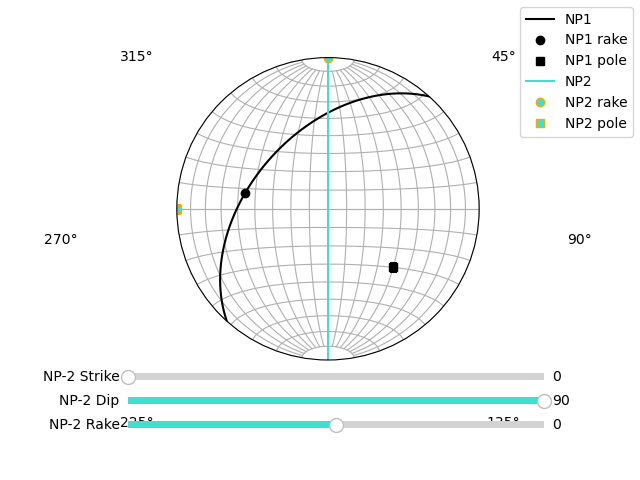

In [3]:
# Set the strike, dip and rake values below.  Leave the commas and brackets as they are.
first_nodal_plane = NodalPlane(
    strike=222,
    dip=48, 
    rake=112
)

fig = FocalMechanism(nodal_plane_1=first_nodal_plane).tweak_np2(show=False)

---

## 2.0 Fitting focal mechanism to polarity data

First you will need to pick polarities for stations using the plots in your worksheet. The cell below makes an editable table in the notebook. Run the cell below then enter your polarities in the table as **U** for upward first motion and **D** for downward first motion:

In [4]:
import ipysheet

datatable = ipysheet.sheet(rows=24, columns=4)
header = ipysheet.row(
    0, ["Station", "Azimuth", "Take-off angle", "Polarity (U/D)"],
    background_color="lightgrey")
cells = ipysheet.cell_range(
    [["ANTO", 312, 27, "U"], 
     ["BFO", 318, 21, None],
     ["CASY", 174, 27, None],
     ["CHTO", 11, 70, None],
     ["COCO", 176, 71, "D"],
     ["DAV", 82, 40, None],
     ["DGAR", 245, 41, None],
     ["FURI", 278, 31, None],
     ["GNI", 316, 30, None],
     ["GUMO", 75, 34, None],
     ["KMBO", 267, 30, None],
     ["KMI", 16, 50, None],
     ["LSA", 351, 41, None],
     ["MBWA", 137, 39, None],
     ["NWAO", 152, 51, None],
     ["PALK", 285, 71, None],
     ["PMG", 104, 33, None],
     ["QIZ", 40, 52, None],
     ["RAYN", 297, 33, None],
     ["SNZO", 132, 22, None],
     ["ULN", 10, 35, None],
     ["WRAB", 123, 36, None],
     ["YSS", 36, 30, None]
    ], row_start=1)

datatable

Sheet(cells=(Cell(column_end=3, column_start=0, row_end=0, row_start=0, squeeze_column=False, style={'backgrou…

Once you have finished entering polarities into the table run the cell below to plot an interactive focal mechanism.  Fit the two nodal-planes to your polarities.  Make sure that your planes are orthogonal and that the rakes make sense.

*Note:* If you find that you want to correct your polarities, just edit the table above and re-run the cell below.  Remember that this will reset your nodal planes, so be sure to write the strike, dip and rake of these planes down before you re-run the cell below.

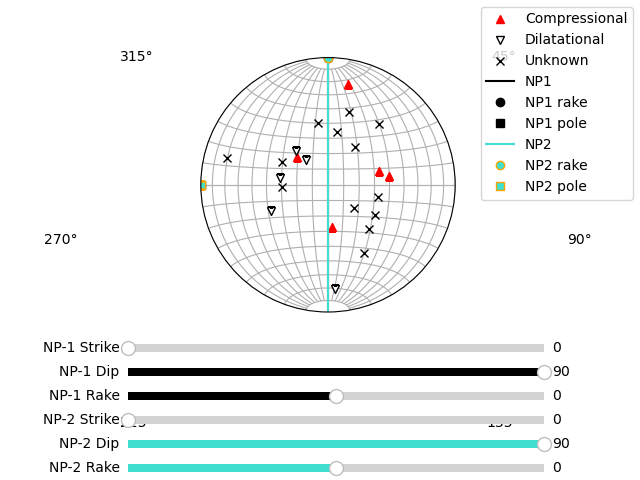

In [5]:
# Convert from table to polarities
polarities = [Polarity(azimuth=v[1], toa=v[2], polarity=v[3]) for v in cells.value]
fig = FocalMechanism(polarities=polarities).find_planes()